In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('combined_data_1.txt' )
df

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
2402139,3.0,2004-08-23
933895,5.0,2005-08-31
2214251,3.0,2003-11-20
1344228,3.0,2004-11-02


In [ ]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column

In [ ]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
#to inspect shape of the dataset
dataset.shape
#2 since we have only extracted 2 columns from df

(2191260, 2)

In [ ]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,100621
2.0,216221
3.0,617344
4.0,759780
5.0,496881


In [ ]:
#get movie count
movie_count = dataset.isnull().sum()[1]
movie_count

413

In [ ]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

350884

In [ ]:
# get rating count
rating_count = dataset['Cust_Id'].count() - movie_count
rating_count

2190847

#  Plot distribution Of Rating

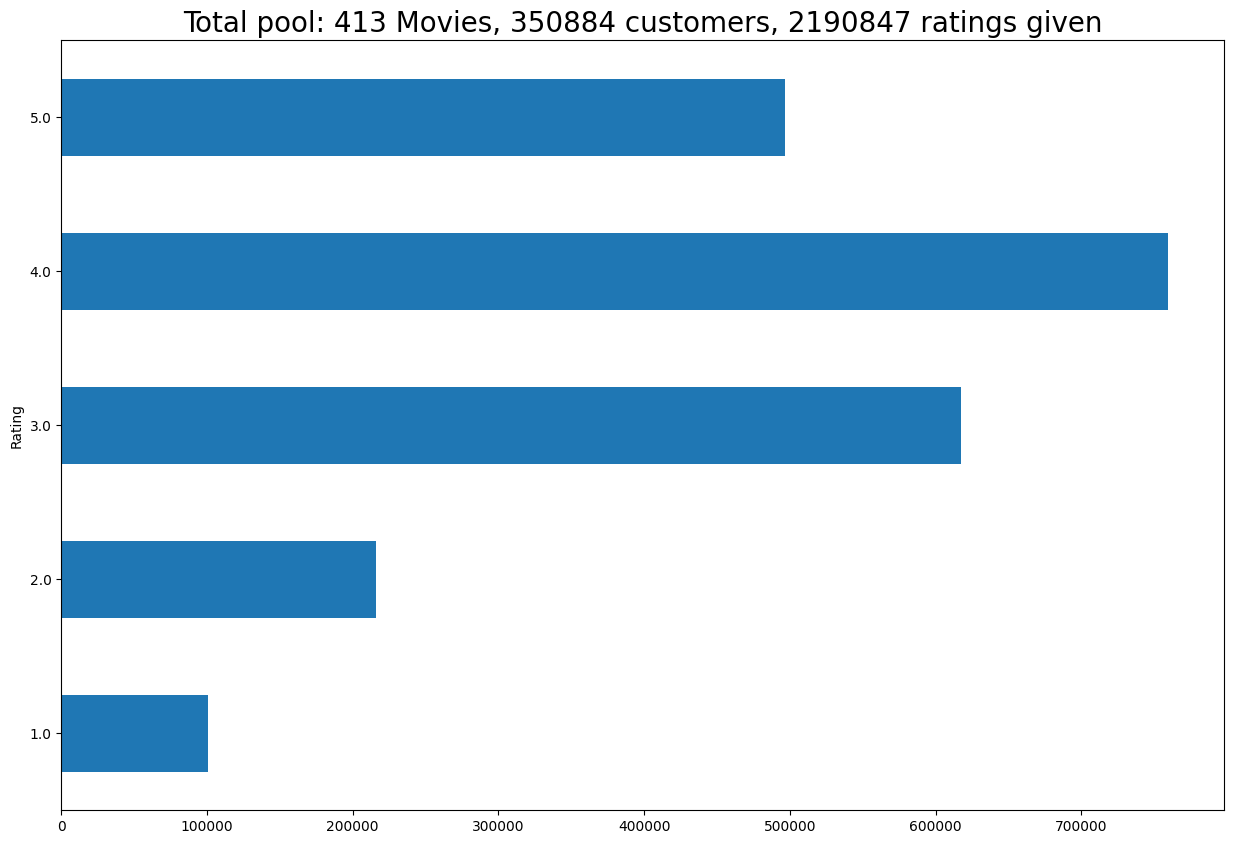

In [ ]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()
#plt.axis('off')
#print--->print data  '' 'Total pool'

In [ ]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [ ]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(413, 1)

In [ ]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
2175904,True
2176352,True
2177362,True
2177566,True


In [ ]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
df_nan['index'][1:]

1          548
2          694
3         2707
4         2850
5         3991
        ...   
408    2175904
409    2176352
410    2177362
411    2177566
412    2177887
Name: index, Length: 412, dtype: int64

In [ ]:
df_nan['index'][:-1]

0            0
1          548
2          694
3         2707
4         2850
        ...   
407    2173082
408    2175904
409    2176352
410    2177362
411    2177566
Name: index, Length: 412, dtype: int64

In [ ]:
#To create a numpy array containing movie ids according the 'ratings' dataset
movie_np = [] #empty list
movie_id = 1  #starting from movie id 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 413. 413. 413.]
Length: 2190847


In [ ]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-19-949fa75c1e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
dataset.tail()

,Cust_Id,Rating,Movie_Id
2191255,1389432,3.0,413
2191256,1875028,4.0,413
2191257,2327122,4.0,413
2191258,78091,1.0,413
2191259,627479,1.0,413


In [ ]:
dataset.shape

(2190847, 3)

# Data Cleaning

In [ ]:
f=['count','mean']

In [ ]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary.index = dataset_movie_summary.index.map(int)
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1941.0


In [ ]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0) #70% quantile
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index #benchmark set
#                                           6                       <   5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 7.0


In [ ]:
print("Original Shape",{dataset.shape})

Original Shape {(2190847, 3)}


In [ ]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (1457877, 3)


In [ ]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3


## Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(110692, 124)


In [ ]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,33,44,...,385,390,393,398,400,401,405,406,408,413
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### To load the movie_titles dataset

In [ ]:
df_title = pd.read_csv('netflix_movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

<ipython-input-30-d9dbbecb048b>:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title = pd.read_csv('netflix_movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])


            Year             Name
Movie_Id                         
Movie_Id   Genre        MovieName
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet
1         Action  Dinosaur Planet


## Installation of sckit-surprise

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.7 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=591120 sha256=6482341e82e4b59846cef92557e6a3e11c2364085f5d355fb491d79568b00db4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import math
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Load Reader library
reader = Reader()
# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
# Use the SVD algorithm.
svd = SVD()
# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9993  0.9923  0.9970  0.9962  0.0029  
MAE (testset)     0.8062  0.8050  0.7970  0.8027  0.0041  
Fit time          1.69    1.74    2.49    1.97    0.36    
Test time         0.35    0.50    0.43    0.43    0.06    


{'test_rmse': array([0.99927262, 0.99227133, 0.99703365]),
 'test_mae': array([0.80619868, 0.80497296, 0.79695786]),
 'fit_time': (1.6904973983764648, 1.7422850131988525, 2.4870142936706543),
 'test_time': (0.35300731658935547, 0.5034492015838623, 0.4283740520477295)}

## To find all the movies rated as 5 stars by user with userId = 712664

In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3             NaN
79    The Killing
79    The Killing
79    The Killing
79    The Killing
79    The Killing
79    The Killing
79    The Killing
79    The Killing
79    The Killing
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

          Year                            Name  Estimate_Score
216054  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216319  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216325  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216324  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216323  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216322  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216321  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216320  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216318  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
216327  RomCom  Aqua Teen Hunger Force: Vol. 1             5.0
